In [ ]:
import pandas as pd
import numpy as np

# Read the data into a pandas DataFrame

path = '/Users/jerzybala/Desktop/Causal Models/mhm_data_2023-10-21_06-53-00.csv'

path2 = '/Users/jerzybala/Desktop/data_causal_all_UPF.csv'

df_org = pd.read_csv(path2)

print(df_org.shape)
#df_org.columns.tolist()

# Calculate the original distribution
original_distribution = df_org['Processed food in diet'].value_counts()
print(original_distribution)    


region_mapping = {
    'Anglosphere': ['United States', 'Canada', 'United Kingdom', 'Ireland', 'New Zealand', 'Australia'],
    'Latin America': ['Argentina', 'Chile', 'Colombia', 'Ecuador', 'Guatemala', 'Mexico', 'Peru', 'Puerto Rico', 'Venezuela', 'Brazil', 'Bolivia', 'Paraguay', 'Uruguay'],
    'Middle East': ['Iraq', 'Saudi Arabia', 'United Arab Emirates', 'Yemen', 'Iran', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Syria', 'Bahrain'],
    'French & Spanish Speaking Mainland Europe': ['Spain', 'France', 'Belgium', 'Switzerland', 'Portugal', 'Italy', 'Greece', 'Germany', 'Austria', 'Netherlands'],
    'West Africa': ['Cameroon', 'Cote d’Ivoire', 'Democratic Republic of the Congo', 'Nigeria', 'Ghana', 'Senegal', 'Mali', 'Niger', 'Guinea'],
    'North Africa': ['Algeria', 'Egypt', 'Morocco', 'Tunisia', 'Libya', 'Sudan'],
    'East & Southeast Asia': ['China', 'Japan', 'South Korea', 'North Korea', 'Vietnam', 'Thailand', 'Malaysia', 'Indonesia', 'Philippines', 'Singapore'],
    'South Asia': ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan'],
    'Eastern Europe & Central Asia': ['Russia', 'Ukraine', 'Belarus', 'Moldova', 'Armenia', 'Azerbaijan', 'Georgia', 'Kazakhstan', 'Uzbekistan', 'Turkmenistan', 'Kyrgyzstan', 'Tajikistan'],
    'Scandinavia & Baltic': ['Sweden', 'Norway', 'Finland', 'Denmark', 'Iceland', 'Estonia', 'Latvia', 'Lithuania'],
    'Oceania & Pacific Islands': ['Fiji', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga'],
    'Sub-Saharan Africa': ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi', 'South Africa', 'Zimbabwe', 'Zambia', 'Botswana', 'Namibia', 'Mozambique', 'Madagascar'],
    'Central America & Caribbean': ['Cuba', 'Dominican Republic', 'Haiti', 'Jamaica', 'Trinidad and Tobago', 'Barbados', 'Saint Lucia', 'Grenada', 'Belize', 'Costa Rica', 'El Salvador', 'Honduras', 'Nicaragua', 'Panama']
    # ... You can continue to add more regions and countries as needed.
}


# Invert the region mapping
country_to_region = {country: region for region, countries in region_mapping.items() for country in countries}

# Map each country to its region
df_org['Region'] = df_org['Country'].map(country_to_region)

# Now 'data' has an additional column 'Region' which indicates the region of each country


(1192252, 165)
Rarely/Never                    127106
A few times a month             125715
A few times a week               84969
Rarely/never                     27105
Once a day                       20110
Several times a day              16050
A few times in a day               317
Several days a week                151
Many times in a day                138
Qualche volta al mese               33
At least once a day                 21
Qualche volta alla settimana        16
Più volte al giorno                  5
Una volta al giorno                  4
Name: Processed food in diet, dtype: int64


In [84]:
#df_org.columns.tolist()

['Language',
 'Start Date (UTC)',
 'Submit Date (UTC)',
 'Time to completion',
 'Overall MHQ',
 'Cognition Dimension',
 'Adaptability & Resilence Dimension',
 'Drive & Motivation Dimension',
 'Mood & Outlook Dimension',
 'Social & Self Dimension',
 'Mind Body Connection Dimension',
 'Understanding of Assessment',
 'Adaptability to Change',
 'Self Worth & Confidence',
 'Creativity & Problem Solving',
 'Drive & Motivation',
 'Stability & Calmness',
 'Sleep Quality',
 'Self Control & Impulsivity',
 'Ability to Learn',
 'Coordination',
 'Relationships with others',
 'Emotional Resilience',
 'Planning & Organisation',
 'Physical Intimacy',
 'Speech & Language',
 'Memory',
 'Social interactions & Cooperation',
 'Decision-making & Risk-taking',
 'Curiosity, Interest & Enthusiasm',
 'Energy Level',
 'Emotional Control',
 'Focus & Concentration',
 'Appetite Regulation',
 'Empathy',
 'Sensory Sensitivity',
 'Self-Image',
 'Outlook & Optimism',
 'Selective Attention',
 'Restlessness & Hyperactivi


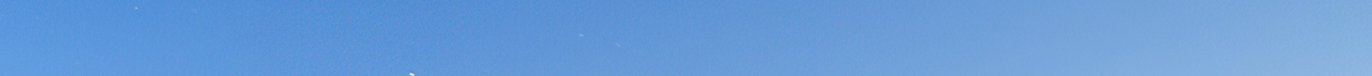


## Initial Feature Subset Selection

In [2]:

set1 = 









df=df_org[]








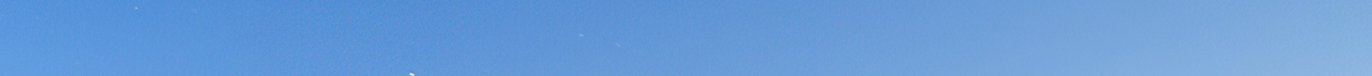


## Processed Food Scenario Selection

In [3]:


# FOOD GROUPS
bad_food_behavior = ['Once a day', 'Several times a day', 'A few times in a day']
good_food_behavior = ['Rarely/Never']


# Combine both lists to create a complete list of behaviors and filter data
all_food_behavior = bad_food_behavior + good_food_behavior
df = df[df['Processed food in diet'].isin(all_food_behavior)]

# Create a dictionary mapping each item in the list to 1, and 'Rarely/Never' to 0
feature_mapping = {value: 1 for value in bad_food_behavior}  # 1 FOR THE BAD BAHAVIOR
feature_mapping['Rarely/Never'] = 0
# Map the values in 'Processed_food_in_diet' using this dictionary
df['Process_Food_Bin'] = df['Processed food in diet'].map(feature_mapping)
#df=df.drop('Processed food in diet', axis=1)



In [65]:
import pandas as pd
import numpy as np

def modify_df(data, percentage_change):
    """Modify the test set based on the percentage change."""
    data_modified = df.copy()
    indices_to_change = data_modified[data_modified['Process_Food_Bin'] == 1].index
    num_indices_to_change = int(len(indices_to_change) * (percentage_change / 100))
    indices_to_change = np.random.choice(indices_to_change, num_indices_to_change, replace=False)
    data_modified.loc[indices_to_change, 'Process_Food_Bin'] = 0

    return data_modified

df_0_percent = modify_df(df, 0)
df_100_percent = modify_df(df, 100)
df_70_percent = modify_df(df, 70)
df_40_percent = modify_df(df, 40)


In [66]:
df_40_percent.columns.to_list()

['Overall MHQ',
 'MHQ_Sign',
 'Age',
 'Biological Sex',
 'Country',
 'Region',
 'Frequency of getting a good nights sleep',
 'Frequency of doing exercise',
 'Frequency of Socializing',
 'Sudden or premature death of a loved one',
 'Divorce/separation  or family breakup',
 'Extreme poverty leading to homelessness and/or hunger.',
 'Forced family control over major life decisions (e.g. marriage)',
 'Prolonged sexual abuse| or severe sexual assault.',
 'Displacement from your home due to political| environmental or economic reasons',
 'Loss of your job or livelihood leading to an inability to make ends meet.',
 'Cyberbullying or online abuse',
 'Threatening| coercive or controlling behavior by another person',
 'Caring for a child or partner with a major chronic disability or illness',
 'I did not experience any of the above',
 'Involvement or close witness to a war',
 'Life threatening or debilitating injury or illness.',
 'Suffered a loss in a major fire| flood| earthquake| or natural d

In [81]:
set1 = [
 'Age',
 'Biological Sex',
 'Frequency of getting a good nights sleep',
 'Frequency of doing exercise',
 'Frequency of Socializing',


 'Prolonged physical abuse| or severe physical assault CT',
 'Physical violence in the home between family members',
 'Prolonged or sustained bullying in person from peers',
 'Parental Divorce or family breakup',
 'Lived with a parent/caregiver who was an alcoholic or who regularly used street drugs',
 'Threatening| coercive or controlling behavior by another person CT',
 
 'Suffered a loss in a major fire| flood| earthquake| or natural disaster CT',
 'Displacement from your home due to political| environmental or economic reasons CT',
 'Life threatening or debilitating injury or illness CT',
 'Forced family control over major life decisions CT',

 'Process_Food_Bin']


data = df_0_percent[set1]

data.columns.tolist()

data.shape



(163583, 16)

In [ ]:

# FILTERS
age_groups1 = ['18-24']
age_groups2 = ['18', '19', '20']
age_groups3 = ['18', '19', '20','18-24', '25-34']


#data = data[data['Age'].isin(age_groups1)]



#  'Region_Anglosphere',
#  'Region_Central America & Caribbean',
#  'Region_East & Southeast Asia',
#  'Region_Eastern Europe & Central Asia',
#  'Region_French & Spanish Speaking Mainland Europe',
#  'Region_Latin America',
#  'Region_Middle East',
#  'Region_North Africa',
#  'Region_Oceania & Pacific Islands',
#  'Region_Scandinavia & Baltic',
#  'Region_South Asia',
#  'Region_Sub-Saharan Africa',
#  'Region_West Africa',

region_group_A = ['Anglosphere']
data = data[data['Region'].isin(region_group_A)]

#data = data[data['Country'].isin(['India'])]

data.shape



KeyError: 'Region'

In [78]:
data.columns.tolist()

['Age',
 'Biological Sex',
 'Frequency of getting a good nights sleep',
 'Frequency of doing exercise',
 'Frequency of Socializing',
 'Prolonged physical abuse| or severe physical assault CT',
 'Physical violence in the home between family members',
 'Prolonged or sustained bullying in person from peers',
 'Parental Divorce or family breakup',
 'Lived with a parent/caregiver who was an alcoholic or who regularly used street drugs',
 'Threatening| coercive or controlling behavior by another person CT',
 'Suffered a loss in a major fire| flood| earthquake| or natural disaster CT',
 'Displacement from your home due to political| environmental or economic reasons CT',
 'Life threatening or debilitating injury or illness CT',
 'Forced family control over major life decisions CT',
 'Process_Food_Bin']

In [ ]:
path2 = '/Users/jerzybala/Desktop/data_causal_all_UPF.csv'

data = pd.read_csv(path2)

data.columns

## Modeling Scenario Selection

In [73]:

import pandas as pd
import matplotlib.pyplot as plt
import bnlearn as bn
from pyvis.network import Network
import networkx as nx
import pygraphviz as pgv
from networkx.drawing.nx_agraph import to_agraph



In [79]:
model = bn.structure_learning.fit(data, methodtype='hc', scoretype='bic')
G = bn.plot(model, interactive=True)
G = model['model']


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 13
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmpjb2lq0wh/d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmpjb2lq0wh/d3graph.html]
[d3blocks] >INFO> Number of unique nodes: 13
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmpws0gnao4/bnlearn_Directed_Acyclic_Graph_(DAG).html]
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/fh/2yy079jj39d78d0mx1nh7rkm0000gn/T/tmpws0gnao4/bnlearn_Directed_Acyclic_Graph_(DAG).html]


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.


In [53]:
# Compute edge strength with chi square test
model = bn.independence_test(model, data, test='chi_square')

# Show the results of the independence test
print(model['independence_test'])

[bnlearn] >Compute edge strength with [chi_square]
                                               source  \
0                                      Biological Sex   
1                                      Biological Sex   
2                         Frequency of doing exercise   
3                            Frequency of Socializing   
4   Prolonged physical abuse| or severe physical a...   
5   Prolonged physical abuse| or severe physical a...   
6   Prolonged physical abuse| or severe physical a...   
7   Physical violence in the home between family m...   
8   Physical violence in the home between family m...   
9   Physical violence in the home between family m...   
10  Prolonged or sustained bullying in person from...   
11  Prolonged or sustained bullying in person from...   
12                 Parental Divorce or family breakup   
13                 Parental Divorce or family breakup   
14  Lived with a parent/caregiver who was an alcoh...   
15  Lived with a parent/caregiver who

In [ ]:

# Convert networkx graph to pyvis network
nt = Network(notebook=True)
nt.from_nx(G)
nt.show("tmp.html")

In [ ]:
# Create a layout for our nodes 
layout = nx.spring_layout(G, k=1)
#layout = nx.kamada_kawai_layout(G)
#layout = nx.fruchterman_reingold_layout(G, k=1, dim=2, iterations=200)
#layout = nx.shell_layout(G)
#layout = nx.circular_layout(G)
#layout = nx.random_layout(G)

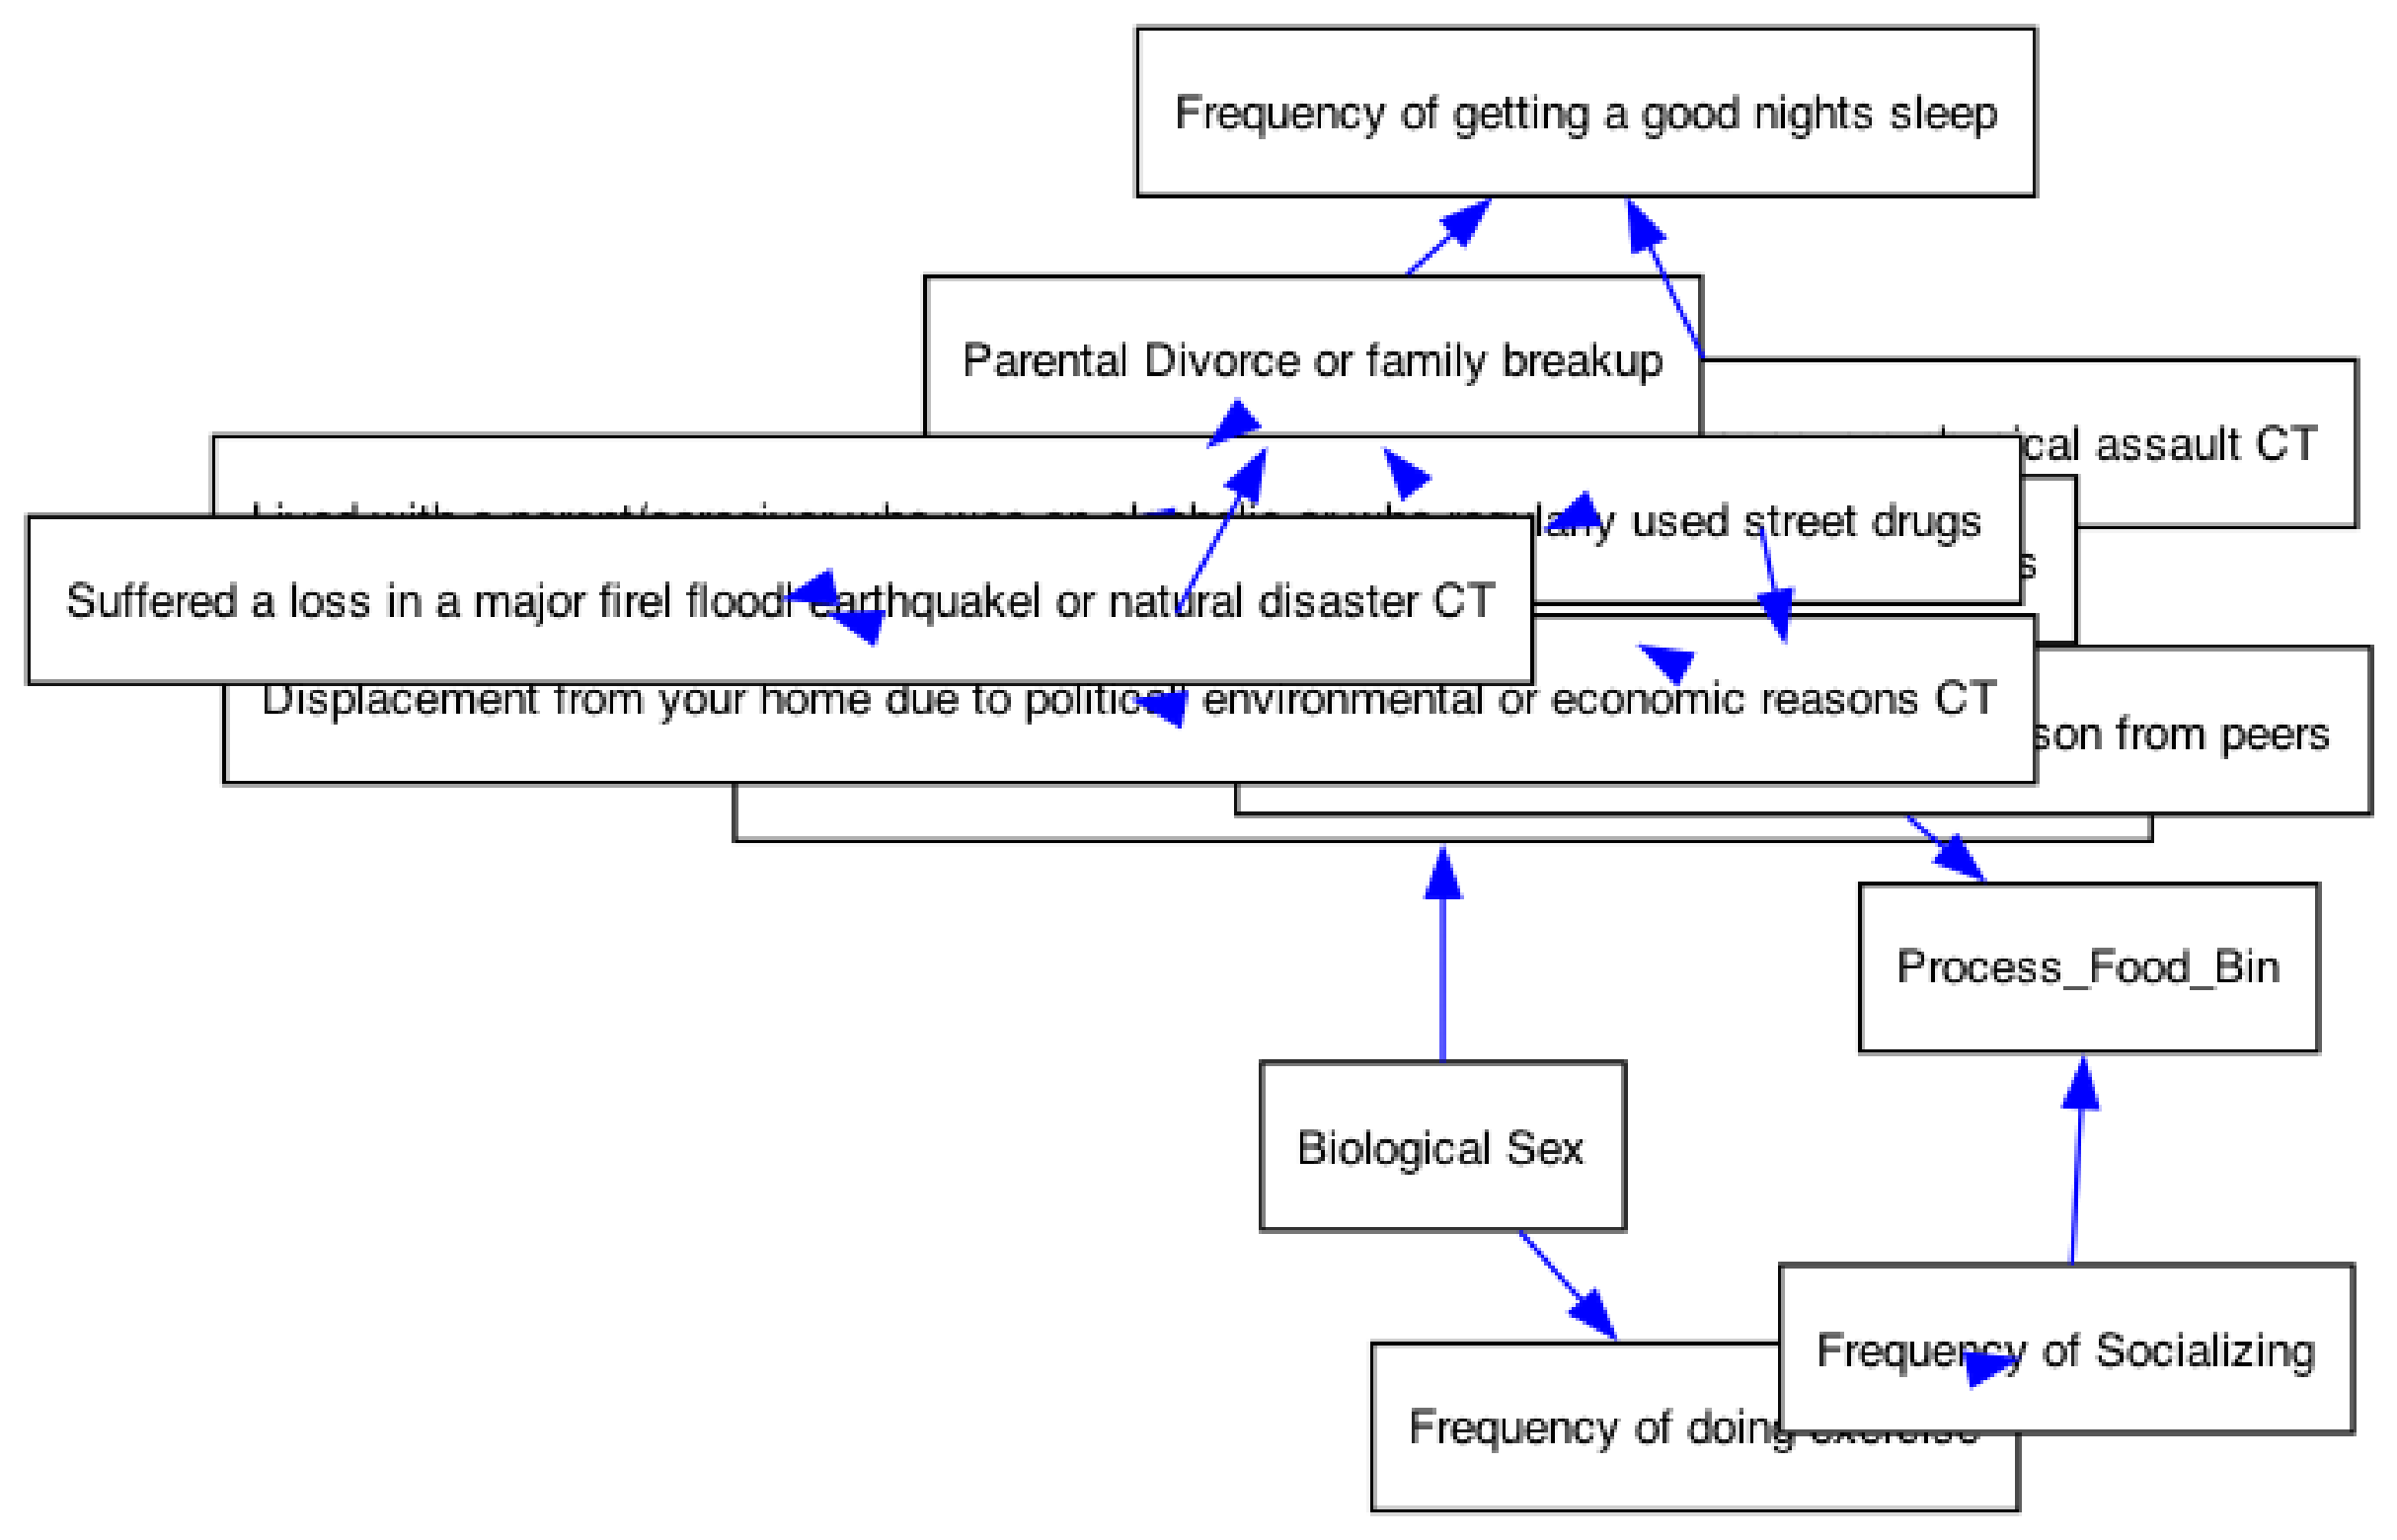

In [74]:
# Convert G to an undirected graph to find connected components
G_undirected = G.to_undirected()

# Find the largest connected component
largest_cc = max(nx.connected_components(G_undirected), key=len)
subgraph = G.subgraph(largest_cc)


# Now use subgraph for your layout and visualization
layout = nx.fruchterman_reingold_layout(subgraph, k=10, dim=2, iterations=20)


# Convert to AGraph (PyGraphviz object)
A = to_agraph(subgraph)

# Change node shape and label properties
#A.node_attr.update(shape="rectangle", style="filled", fillcolor="white", fontname="Helvetica", fontsize=10)

# Change node shape and label properties
A.node_attr.update(shape=True, style="filled", fillcolor="white", fontname="Helvetica", fontsize=10)

for node in subgraph.nodes():
    A.get_node(node).attr['pos'] = f"{layout[node][0]*72},{layout[node][1]*200}"

A.edge_attr.update(splines="curved", color="blue", width=4)
A.draw('graph.png', format='png', prog='neato')

# Display the image using Matplotlib

# Set font attributes for nodes and edges
A.node_attr.update(fontname="Helvetica", fontsize=55, fontcolor="black")
A.edge_attr.update(fontsize=10)

img = plt.imread('graph.png')
plt.figure(figsize=(35, 20))
plt.imshow(img)
plt.axis('off')
plt.show()

## Main Graph Visualization

In [80]:
from pyvis.network import Network
import gravis as gv
import networkx as nx
from matplotlib.pyplot import figure

# Your code to create and populate the networkx graph G
# ...

figure(figsize=(15,20))

g = Network(cdn_resources="in_line", notebook=True, width='2000px', height='1500px')
g.toggle_physics(True)

# Add nodes from G to the pyvis network
for node in G.nodes():
    g.add_node(node, label=str(node))

# Add edges with specific width
edge_width = 10  # Set your desired edge width here
for edge in G.edges():
    g.add_edge(edge[0], edge[1], width=edge_width)


g.toggle_hide_edges_on_drag(True)
g.force_atlas_2based()
g.from_nx(G)


g.set_options("""
var options = {
  "physics": {
      "barnesHut": {
      
          "springLength": 650,
          "springConstant": 0.05,
          "damping": 0.1
      
      },

      "repulsion": {
      
          "nodeDistance": 650,
          "springLenght": 550,
          "springConstant": 0.01
      
      },
   
      
      "maxVelocity": 200,
      "minVelocity": 0.1,

    
    "solver": "repulsion"

  },
  "nodes": {
    "borderWidth": 30,
    "borderWidthSelected": null,
    "opacity": null,
    "font": {
      "size": 80,
      "face": "verdana"
    },
    "size": 20
  },
  "edges": {
  
    "width": 60,
    "arrows": {
      "to": { "enabled": true, "scaleFactor": 4.0 }
    },
    "color": {
      "color": "#848484",
      "highlight": "#848484",
      "hover": "#848484",
      "inherit": "from",
      "opacity": 1.0
    },
    "smooth": true
  }
}
""")



g.show("graph.html")




graph.html


<Figure size 1500x2000 with 0 Axes>

In [ ]:
import gravis as gv
import networkx as nx

g = nx.cycle_graph(10)
g.graph['node_color'] = 'blue'
g.nodes[1]['title'] = 'Number 1'
g.nodes[1]['group'] = 1
g.nodes[3]['title'] = 'I belong to a different group!'
g.nodes[3]['group'] = 10
g.nodes[3]['color'] = 'orange'
g.add_node(20, size=20, title='couple', group=2, color='red')
g.add_node(21, size=15, title='couple', group=2, color='red')
g.add_edge(20, 21, weight=5)
g.add_node(25, size=25, label='lonely', title='lonely node', group=3, color='green')

gv.d3(g)

In [ ]:
import gravis as gv
import networkx as nx

g = nx.cycle_graph(10)
g.graph['node_color'] = 'blue'
g.nodes[1]['title'] = 'Number 1'
g.nodes[1]['group'] = 1
g.nodes[3]['title'] = 'I belong to a different group!'
g.nodes[3]['group'] = 10
g.nodes[3]['color'] = 'orange'
g.add_node(20, size=20, title='couple', group=2, color='red')
g.add_node(21, size=15, title='couple', group=2, color='red')
g.add_edge(20, 21, weight=5)
g.add_node(25, size=25, label='lonely', title='lonely node', group=3, color='green')

gv.d3(g)